# Pipeline to compute attractors/phenotype distribution differences between resistant and sensitive patients and gene differently expression analysis

In [1]:
import pandas as pd
from scipy import stats


from functions.analysis import downstream_analysis
from functions.analysis_utils.MaBoSS_simulation.maboss_phenotype_patient import compute_phenotype_table, collect_group_data,  compute_mean_phenotype_values
from functions.analysis_utils.results_MaBoSS_visualization.boxplot_phenotype import create_boxplot
from functions.analysis_utils.genes_intervention.pers_interventions import tailor_bnd_genes_intervention
from functions.analysis_utils.stats.stats_proba import compute_mannwhitneyu_test_means


from functions.analysis_utils.results_MaBoSS_visualization.create_phenotypes_patients_table import (
    vizualise_table_phenotype_condition, plot_side_by_side_heatmaps
)

from functions.analysis_utils.gene_enrichment.genes_signature import create_results_gene_enrichment

from functions.analysis_utils.results_MaBoSS_visualization.patients_ids_phenotype_table import create_combined_table_patients

from functions.analysis_utils.stats.stats_proba import compute_power_calculation


### User data parameters

In [2]:
# models inputs
patients_categ = ['resistant', 'sensitive', 'healthy']

inputs_list = ['EGF', 'FGF', 'TGFB', 'ANDROGEN', 'HYPOXIA', 'NUTRIENTS', 'CARCINOGEN', 'ACIDOSIS', 'TNF', 'SPOP']

# models outputs
phenotype_interest = ["PROLIFERATION","INVASION","DNA_REPAIR","APOPTOSIS"]


type_models = 'genes_models'
drug_interest = 'Refametinib' 
drug_targets = ['MAP2K1', 'MAP2K2']

# tissue_interest = 'HAEMATOPOIETIC AND LYMPHOID'


subdir = f"{'_'.join(drug_targets)}_target_block"



# folder_models = f"analysis/{drug_interest}/{type_models}/{subdir}/models"
# folder_results = f"analysis/{drug_interest}/{type_models}/{subdir}"

#blood tissue
# folder_models = f"analysis/{drug_interest}/{type_models}/{subdir}/models"
# folder_results = f"analysis/{drug_interest}/{type_models}/{subdir}"

folder_models = f"analysis/{drug_interest}/{type_models}/{subdir}/models"
folder_results = f"analysis/{drug_interest}/{type_models}/{subdir}"



annotations_models = pd.read_csv('data/model_list_20250407.csv')
# Montagud analysis - Growth factors (EGF and FGF), Nutrients and Androgen ON
# # Montagud analysis - Carcinogen, Androgen, TNFalpha, Acidosis, and Hypoxia
# list_active_inputs =  [['EGF', 'FGF', 'NUTRIENTS', 'ANDROGEN'], 
#                         ['CARCINOGEN', 'ANDROGEN', 'TNF', 'ACIDOSIS', 'HYPOXIA']
#                         ]


### Loading the datasets

In [3]:
# Load top patient IDs from files saved in pipeline 1
with open(f"analysis/{drug_interest}/top_resistant_ids.txt") as f:
    top_resistant_ids = [line.strip() for line in f if line.strip()]

with open(f"analysis/{drug_interest}/top_sensitive_ids.txt") as f:
    top_sensitive_ids = [line.strip() for line in f if line.strip()]


with open(f"analysis/{drug_interest}/top_healthy_ids.txt") as f:
    top_healthy_ids = [line.strip() for line in f if line.strip()]



### Compute attractors/ phenotypes distribution and differential genes expression

In [4]:
# simulate growth factors (EGF and FGF), Nutrients and Androgen ON (cf Montagud paper)
# #  simulate with Carcinogen, Androgen, TNFalpha, Acidosis, and Hypoxia ON. (cf Montagud paper)
# downstream_analysis(folder_results,folder_models, drug_interest, top_resistant_ids, top_sensitive_ids, top_healthy_ids, patients_categ, inputs_list, phenotype_interest, annotations_models, list_active_inputs = list_active_inputs)

In [5]:
folder_models

'analysis/Refametinib/genes_models/MAP2K1_MAP2K2_target_block/models'

In [6]:
# for each input ON at a time 
downstream_analysis(folder_results,folder_models, drug_interest, top_resistant_ids, top_sensitive_ids, top_healthy_ids, patients_categ, inputs_list, phenotype_interest, annotations_models, list_active_inputs = None)

KeyboardInterrupt: 

### Downstream analysis - test CTNNB1 gene 

In [ ]:
# compute the mean of the genes identified in the previous differential expression genes analysis
genes_diff_expressed = pd.read_csv('analysis/Refametinib/genes_models/MEK1_MEK2_target_block/results/genes_diff_expressed/significant_genes_EGF_ON_INVASION.csv', index_col=0)

In [ ]:


# Find the integer position of the index label 'VHL'
cutoff_position = genes_diff_expressed.index.get_loc('VHL')

# Slice the DataFrame up to that position
genes_diff_expressed_table = genes_diff_expressed.iloc[:cutoff_position + 1]

# # Optional: reset index if needed
# genes_diff_expressed_table.reset_index(inplace=True)


In [ ]:
values_ctnnb1_healthy = list(rna_seq_data[
    (rna_seq_data['model_id'].isin(top_healthy_ids)) &
    (rna_seq_data['gene_symbol'] == 'CTNNB1')
]['rsem_tpm'])


values_ctnnb1_resistant = list(rna_seq_data[
    (rna_seq_data['model_id'].isin(top_resistant_ids)) &
    (rna_seq_data['gene_symbol'] == 'CTNNB1')
]['rsem_tpm'])

values_ctnnb1_sensitive = list(rna_seq_data[
    (rna_seq_data['model_id'].isin(top_sensitive_ids)) &
    (rna_seq_data['gene_symbol'] == 'CTNNB1')
]['rsem_tpm'])

In [ ]:
# kruskal test
result = stats.kruskal(values_ctnnb1_healthy, values_ctnnb1_resistant, values_ctnnb1_sensitive)
result

KruskalResult(statistic=np.float64(9.793832980346622), pvalue=np.float64(0.007469580120591721))

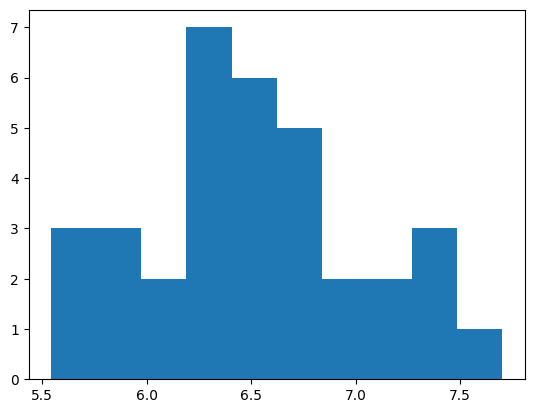

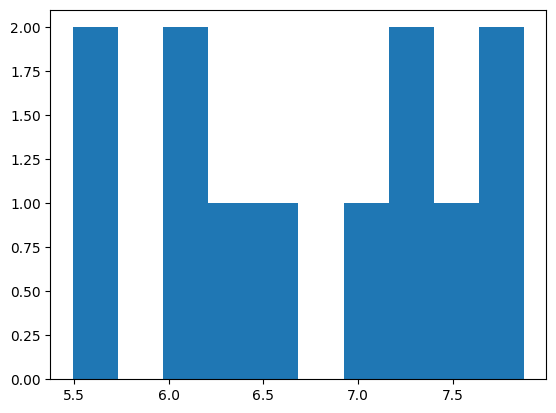

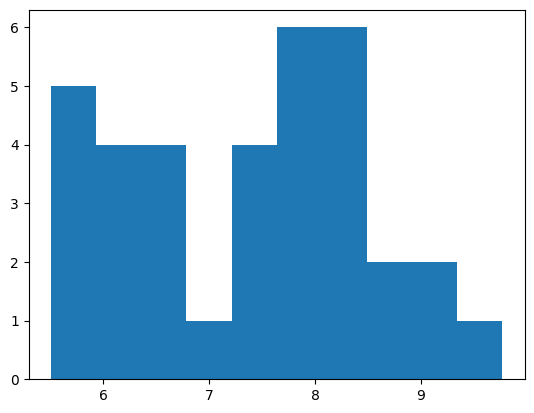

In [ ]:
# check the shape does not change to make sure the difference observed is due to diff means
import matplotlib.pyplot as plt


plt.hist(values_ctnnb1_resistant)
plt.show() 

plt.hist(values_ctnnb1_healthy)
plt.show() 

plt.hist(values_ctnnb1_sensitive)
plt.show() 



/var/folders/83/pqwsm5cn7vscbq8l3fnf30qr0000gn/T/ipykernel_80739/633322516.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_dict.values(), labels=data_dict.keys())


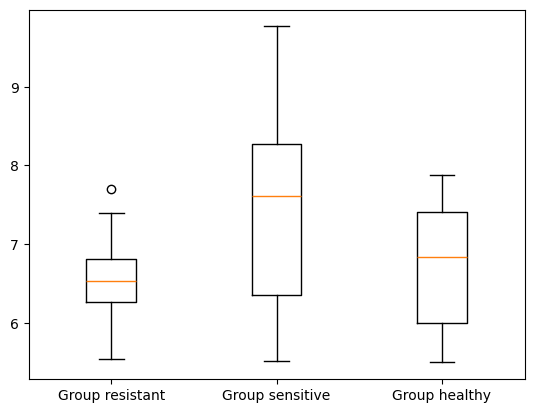

In [ ]:
data_dict = {
    'Group resistant': values_ctnnb1_resistant,
    'Group sensitive': values_ctnnb1_sensitive,
    'Group healthy': values_ctnnb1_healthy
}

# Creating the boxplot
plt.boxplot(data_dict.values(), labels=data_dict.keys())
plt.show()